# CLIENT: OLIST

"[Olist is] the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com"

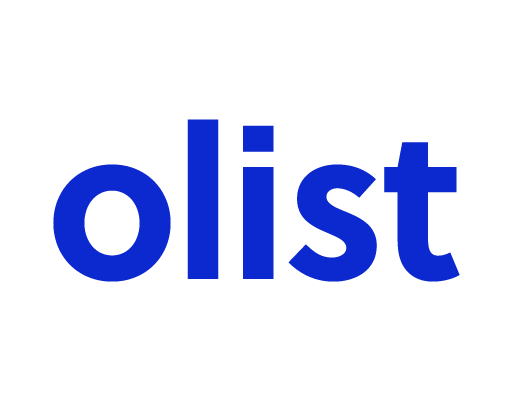

In [1]:
from IPython.display import Image
Image(filename='img/olist_logo.PNG', width=200, height=40) 

# PROJECT SCOPE

Assignment = Model for customer lifetime value (LTV) value for first 6 months of customer

The goals of customer LTV include:
* Distinguish active customers from inactive customers.
* Generate transaction forecasts for individual customers.
* Predict the purchase volume of the entire customer base.

# DATA BACKGROUND

### DATA SOURCE
Source: Kaggle
https://www.kaggle.com/olistbr/brazilian-ecommerce

Data Provided: 
* 9 related tables that together provide data on Olist customer journey and operations
* Companies and partners were replaced with Game Of Thrones great houses


### ASSUMPTIONS

* No major changes since last day of data
* 6 months is suitable to address LTV (limitation of data)

### NOTES
* Only the first 6 months of a customer data will be used for analysis unless otherwise noted
* Using payment_value to represent revenue but this includes liabilities (freight, tax, commision to seller, credit card processing fee, etc)
* Orders with status 'canceled were removed from database


### TOOLS

* SQL: Creating dataframes to upload + Data Qualification
* Python - Pandas, Numpy, Matplotlib, StatsModel, Seaborn,Scipy


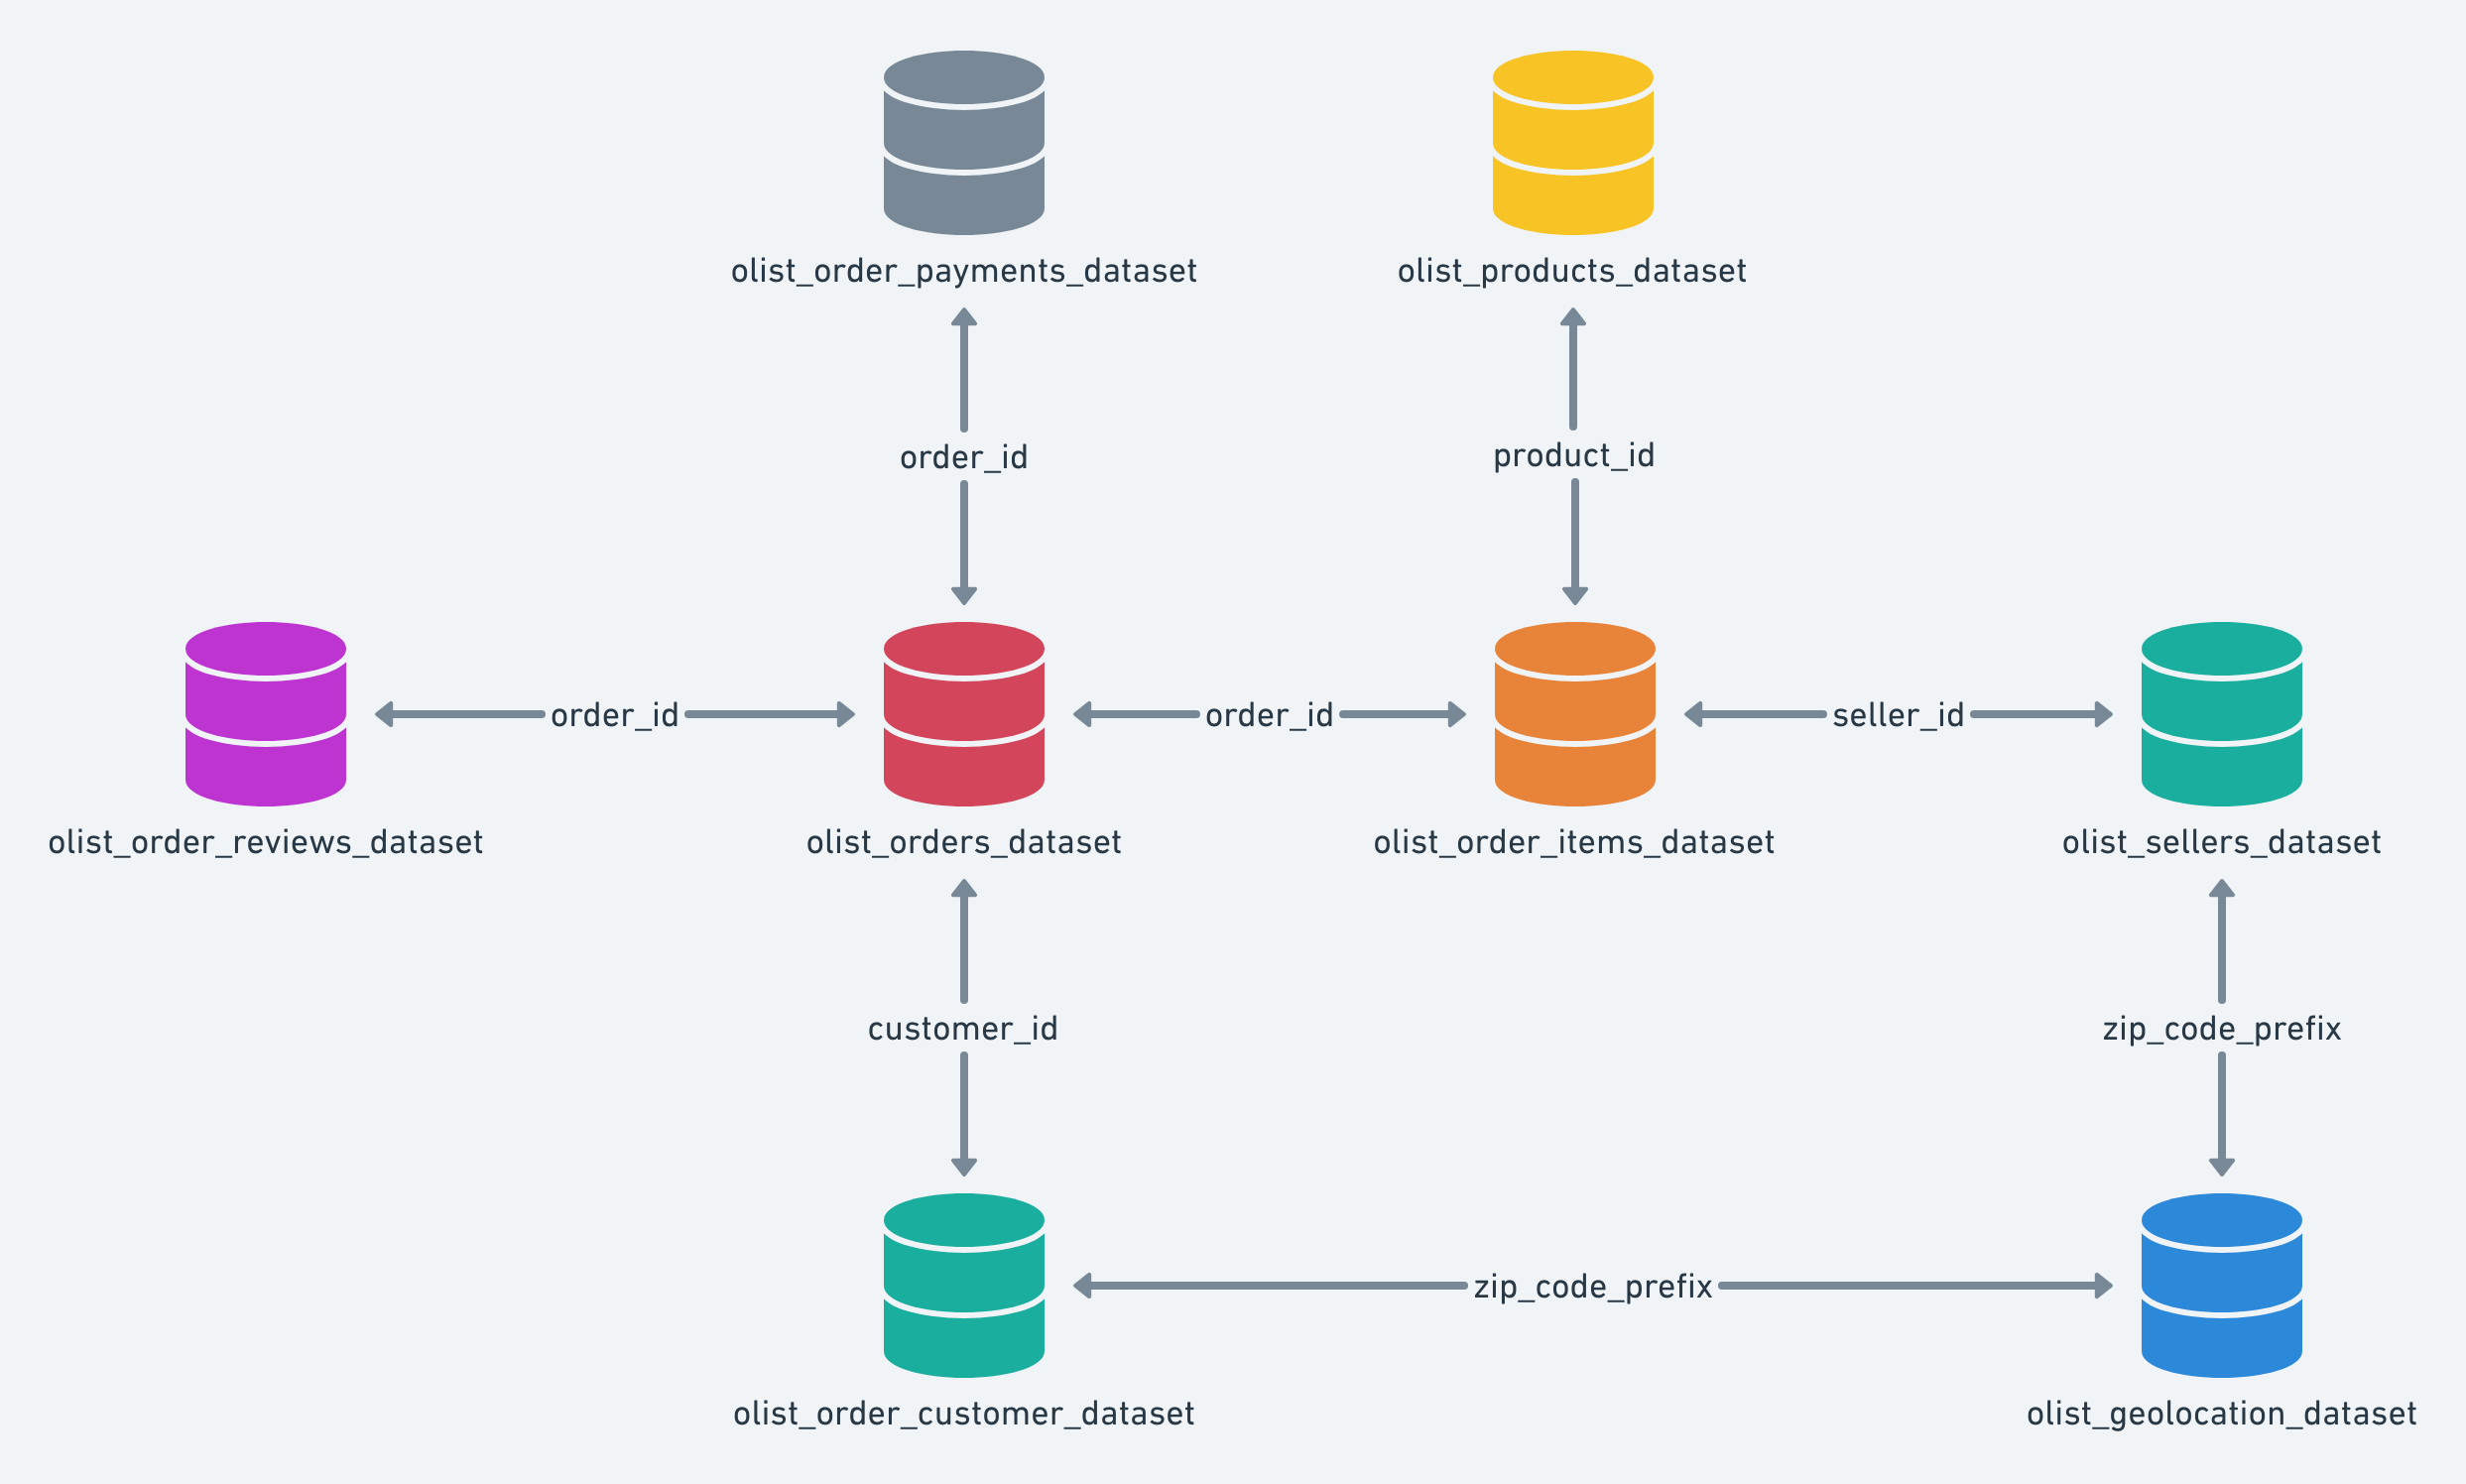

In [2]:
from IPython.display import Image
Image(filename='img/Schema.PNG', width=1000, height=500) 

# SETTING UP ENVIRONMENT

In [3]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# DATA CLEANING AND EXPLORATION

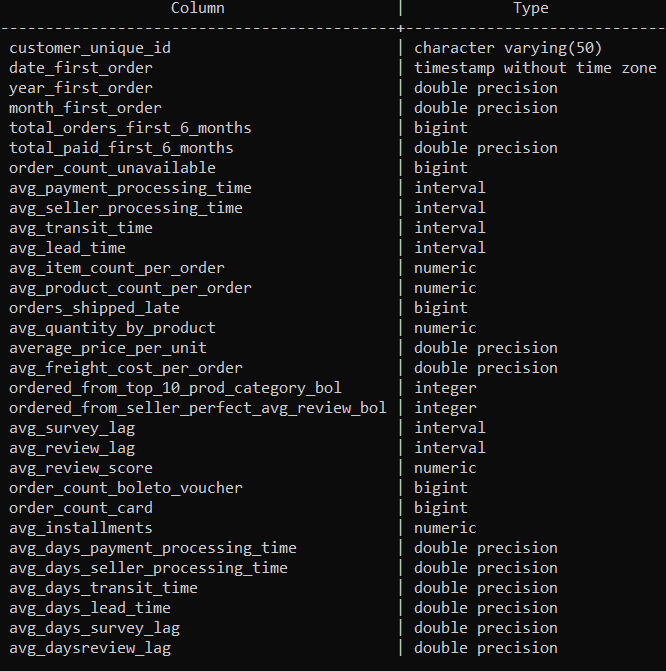

In [4]:
# Dataframe to upload created in PostgreSQL with pertinent variables aggregated
Image(filename='img/sql_df2.PNG', width=600, height=300)

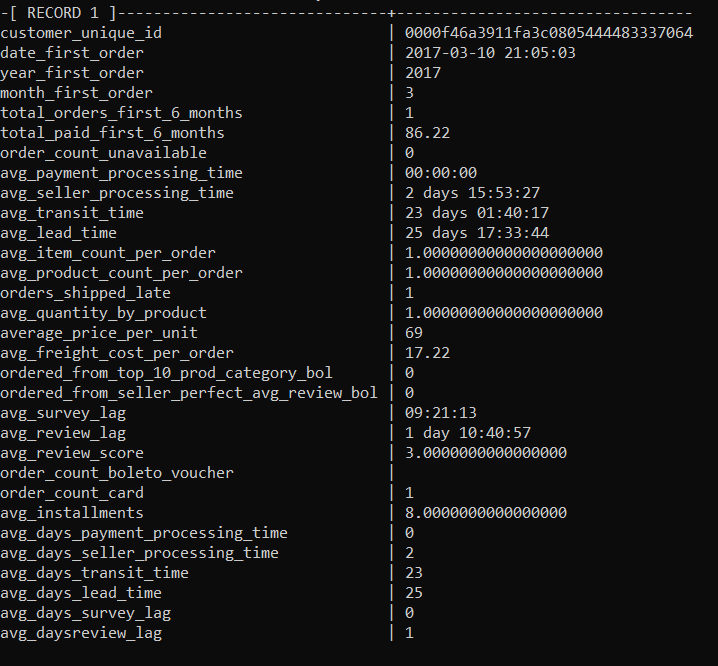

In [5]:
# Below is 1 record from SQL source

Image(filename='img/sql_df.PNG', width=600, height=300) 

In [6]:
# From SQL Query

df = pd.read_csv('main_df.csv',na_values=['NULL'])

In [7]:
df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,...,avg_review_score,order_count_boleto_voucher,order_count_card,avg_installments,avg_days_payment_processing_time,avg_days_seller_processing_time,avg_days_transit_time,avg_days_lead_time,avg_days_survey_lag,avg_daysreview_lag
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22,0,00:00:00,2 days 15:53:27,23 days 01:40:17,...,3.0,NaN,1.0,8.0,0.0,2.0,23.0,25.0,0.0,1.0
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62,0,00:19:36,23:38:38,19 days 01:14:46,...,4.0,NaN,1.0,4.0,0.0,0.0,19.0,20.0,0.0,1.0
2,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018,4,1,35.38,0,4 days 14:53:50,5 days 02:27:37,1 day 20:43:59,...,4.0,1.0,NaN,1.0,4.0,5.0,1.0,6.0,0.0,4.0
3,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018,2,1,419.18,0,00:17:01,1 day 08:53:49,14 days 22:53:21,...,1.0,NaN,1.0,3.0,0.0,1.0,14.0,16.0,0.0,1.0
4,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017,3,1,150.12,0,00:11:14,1 day 05:41:55,3 days 03:19:01,...,4.0,NaN,1.0,3.0,0.0,1.0,3.0,4.0,0.0,6.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 31 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null object
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95538 non-null object
avg_seller_processing_time                    94217 non-null object
avg_transit_time                              93306 non-null object
avg_lead_time                                 93327 non-null object
avg_item_count_per_order                      94978 non-null float64
avg_product_count_per_order                   94978 non-null float64
orders_s

In [9]:
# update data type of date_first_order to datetime

df['date_first_order'] = pd.to_datetime(df.date_first_order)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 31 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95538 non-null object
avg_seller_processing_time                    94217 non-null object
avg_transit_time                              93306 non-null object
avg_lead_time                                 93327 non-null object
avg_item_count_per_order                      94978 non-null float64
avg_product_count_per_order                   94978 non-null float64


In [11]:
# update data type of intervals

df['avg_payment_processing_time'] = pd.to_timedelta(df.avg_payment_processing_time)

In [12]:
df['avg_seller_processing_time'] = pd.to_timedelta(df.avg_seller_processing_time)

In [13]:
df['avg_transit_time'] = pd.to_timedelta(df.avg_transit_time)

In [14]:
df['avg_lead_time'] = pd.to_timedelta(df.avg_lead_time)

In [15]:
df['avg_survey_lag'] = pd.to_timedelta(df.avg_survey_lag)

In [16]:
df['avg_review_lag'] = pd.to_timedelta(df.avg_review_lag)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 31 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95538 non-null timedelta64[ns]
avg_seller_processing_time                    94217 non-null timedelta64[ns]
avg_transit_time                              93306 non-null timedelta64[ns]
avg_lead_time                                 93327 non-null timedelta64[ns]
avg_item_count_per_order                      94978 non-null float64
avg_product_count_per_order      

In [18]:
df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,...,avg_review_score,order_count_boleto_voucher,order_count_card,avg_installments,avg_days_payment_processing_time,avg_days_seller_processing_time,avg_days_transit_time,avg_days_lead_time,avg_days_survey_lag,avg_daysreview_lag
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22,0,0 days 00:00:00,2 days 15:53:27,23 days 01:40:17,...,3.0,NaN,1.0,8.0,0.0,2.0,23.0,25.0,0.0,1.0
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62,0,0 days 00:19:36,0 days 23:38:38,19 days 01:14:46,...,4.0,NaN,1.0,4.0,0.0,0.0,19.0,20.0,0.0,1.0
2,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018,4,1,35.38,0,4 days 14:53:50,5 days 02:27:37,1 days 20:43:59,...,4.0,1.0,NaN,1.0,4.0,5.0,1.0,6.0,0.0,4.0
3,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018,2,1,419.18,0,0 days 00:17:01,1 days 08:53:49,14 days 22:53:21,...,1.0,NaN,1.0,3.0,0.0,1.0,14.0,16.0,0.0,1.0
4,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017,3,1,150.12,0,0 days 00:11:14,1 days 05:41:55,3 days 03:19:01,...,4.0,NaN,1.0,3.0,0.0,1.0,3.0,4.0,0.0,6.0


In [19]:
df.shape

(95557, 31)

In [20]:
# create active boolean column for possible later segmentation

df['Active?'] = np.where(df['total_orders_first_6_months']>1, 1, 0)

In [21]:
# confirm new column was made

df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,...,order_count_boleto_voucher,order_count_card,avg_installments,avg_days_payment_processing_time,avg_days_seller_processing_time,avg_days_transit_time,avg_days_lead_time,avg_days_survey_lag,avg_daysreview_lag,Active?
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22,0,0 days 00:00:00,2 days 15:53:27,23 days 01:40:17,...,NaN,1.0,8.0,0.0,2.0,23.0,25.0,0.0,1.0,0
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62,0,0 days 00:19:36,0 days 23:38:38,19 days 01:14:46,...,NaN,1.0,4.0,0.0,0.0,19.0,20.0,0.0,1.0,0
2,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018,4,1,35.38,0,4 days 14:53:50,5 days 02:27:37,1 days 20:43:59,...,1.0,NaN,1.0,4.0,5.0,1.0,6.0,0.0,4.0,0
3,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018,2,1,419.18,0,0 days 00:17:01,1 days 08:53:49,14 days 22:53:21,...,NaN,1.0,3.0,0.0,1.0,14.0,16.0,0.0,1.0,0
4,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017,3,1,150.12,0,0 days 00:11:14,1 days 05:41:55,3 days 03:19:01,...,NaN,1.0,3.0,0.0,1.0,3.0,4.0,0.0,6.0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 32 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95538 non-null timedelta64[ns]
avg_seller_processing_time                    94217 non-null timedelta64[ns]
avg_transit_time                              93306 non-null timedelta64[ns]
avg_lead_time                                 93327 non-null timedelta64[ns]
avg_item_count_per_order                      94978 non-null float64
avg_product_count_per_order      

In [23]:
# update nulls in numeric fields

df[['avg_item_count_per_order']] = df[['avg_item_count_per_order']].fillna(value=df[['avg_item_count_per_order']].mean())

In [24]:
df[['avg_product_count_per_order']] = df[['avg_product_count_per_order']].fillna(value=df[['avg_product_count_per_order']].mean())

In [25]:
df[['orders_shipped_late']] = df[['orders_shipped_late']].fillna(value=0)

In [26]:
df[['avg_quantity_by_product']] = df[['avg_quantity_by_product']].fillna(value=df[['avg_quantity_by_product']].mean)

In [27]:
df[['average_price_per_unit']] = df[['average_price_per_unit']].fillna(value=0)

In [28]:
df[['avg_freight_cost_per_order']] = df[['avg_freight_cost_per_order']].fillna(value=df[['average_price_per_unit']].mean())

In [29]:
df[['avg_review_score']] = df[['avg_review_score']].fillna(value=df[['avg_review_score']].mean())

In [30]:
df[['order_count_boleto_voucher']] = df[['order_count_boleto_voucher']].fillna(value=0)

In [31]:
df[['order_count_card']] = df[['order_count_boleto_voucher']].fillna(value=0)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 32 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95538 non-null timedelta64[ns]
avg_seller_processing_time                    94217 non-null timedelta64[ns]
avg_transit_time                              93306 non-null timedelta64[ns]
avg_lead_time                                 93327 non-null timedelta64[ns]
avg_item_count_per_order                      95557 non-null float64
avg_product_count_per_order      

In [33]:
# nulls in timedelta columns to be all replaced by average

df[['avg_payment_processing_time']] = df[['avg_payment_processing_time']].fillna(value=df[['avg_payment_processing_time']].mean())

In [34]:
df[['avg_seller_processing_time']] = df[['avg_seller_processing_time']].fillna(value=df[['avg_seller_processing_time']].mean())

In [35]:
df[['avg_transit_time']] = df[['avg_transit_time']].fillna(value=df[['avg_transit_time']].mean())

In [36]:
df[['avg_lead_time']] = df[['avg_lead_time']].fillna(value=df[['avg_lead_time']].mean())

In [37]:
df[['avg_survey_lag']] = df[['avg_survey_lag']].fillna(value=df[['avg_survey_lag']].mean())

In [38]:
df[['avg_review_lag']] = df[['avg_review_lag']].fillna(value=df[['avg_review_lag']].mean())

In [39]:
df[['avg_freight_cost_per_order']] = df[['avg_freight_cost_per_order']].fillna(value=df[['avg_freight_cost_per_order']].mean())

In [40]:
df[['avg_days_payment_processing_time']] = df[['avg_days_payment_processing_time']].fillna(value=df[['avg_days_payment_processing_time']].mean())

In [41]:
df[['avg_days_seller_processing_time']] = df[['avg_days_seller_processing_time']].fillna(value=df[['avg_days_seller_processing_time']].mean())

In [42]:
df[['avg_days_transit_time']] = df[['avg_days_transit_time']].fillna(value=df[['avg_days_transit_time']].mean())

In [43]:
df[['avg_days_lead_time']] = df[['avg_days_lead_time']].fillna(value=df[['avg_days_lead_time']].mean())

In [44]:
df[['avg_days_survey_lag']] = df[['avg_days_survey_lag']].fillna(value=df[['avg_days_survey_lag']].mean())

In [45]:
df[['avg_daysreview_lag']] = df[['avg_daysreview_lag']].fillna(value=df[['avg_daysreview_lag']].mean())

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 32 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95557 non-null timedelta64[ns]
avg_seller_processing_time                    95557 non-null timedelta64[ns]
avg_transit_time                              95557 non-null timedelta64[ns]
avg_lead_time                                 95557 non-null timedelta64[ns]
avg_item_count_per_order                      95557 non-null float64
avg_product_count_per_order      

In [47]:
# count of orders to be used in new variables as proportion of total orders for model

df['perc_orders_unavailable'] = df['order_count_unavailable'] /df['total_orders_first_6_months']

In [48]:
df['perc_orders_shipped_late'] = df['orders_shipped_late'] /df['total_orders_first_6_months']

In [49]:
df['perc_orders_boleto_voucher'] = df['order_count_boleto_voucher'] /df['total_orders_first_6_months']

In [50]:
df['perc_orders_credit_debit'] = df['order_count_card'] /df['total_orders_first_6_months']

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 36 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95557 non-null timedelta64[ns]
avg_seller_processing_time                    95557 non-null timedelta64[ns]
avg_transit_time                              95557 non-null timedelta64[ns]
avg_lead_time                                 95557 non-null timedelta64[ns]
avg_item_count_per_order                      95557 non-null float64
avg_product_count_per_order      

# EXPLORATORY DATA ANALYSIS

In [52]:
df.describe()

,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,avg_lead_time,avg_item_count_per_order,...,avg_days_seller_processing_time,avg_days_transit_time,avg_days_lead_time,avg_days_survey_lag,avg_daysreview_lag,Active?,perc_orders_unavailable,perc_orders_shipped_late,perc_orders_boleto_voucher,perc_orders_credit_debit
count,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000,95557,95557,95557,95557,95557.000000,...,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000
mean,2017.538862,6.032023,1.027722,165.114350,0.006321,0 days 10:24:55.742172,3 days 05:43:04.200089,9 days 08:18:29.293808,12 days 13:37:49.120114,1.138711,...,2.742117,8.888067,12.097110,0.121645,3.139471,0.025398,0.006143,0.897097,0.256209,0.256209
std,0.504728,3.233668,0.183784,227.022859,0.079910,1 days 01:52:53.176134,3 days 12:36:33.538067,8 days 15:55:47.743931,9 days 10:30:00.330823,0.524213,...,3.538160,8.650098,9.443168,1.207217,9.771284,0.157333,0.077791,0.302128,0.556636,0.556636
min,2016.000000,1.000000,1.000000,9.590000,0.000000,0 days 00:00:00,0 days 00:00:32,0 days 00:00:00,0 days 12:48:07,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,1.000000,62.980000,0.000000,0 days 00:12:57,1 days 03:31:34,4 days 04:04:34,6 days 20:47:12,1.000000,...,1.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2018.000000,6.000000,1.000000,107.650000,0.000000,0 days 00:20:47,2 days 06:01:17,7 days 04:22:20,10 days 10:22:38,1.000000,...,2.000000,7.000000,10.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2018.000000,8.000000,1.000000,181.780000,0.000000,0 days 14:39:41,4 days 01:01:28,11 days 22:18:00,15 days 10:17:21,1.000000,...,4.000000,11.000000,15.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,12.000000,9.000000,13664.080000,2.000000,187 days 21:10:50,125 days 18:36:45,205 days 04:35:00,209 days 15:05:12,21.000000,...,125.000000,205.000000,209.000000,66.000000,518.000000,1.000000,1.000000,1.000000,29.000000,29.000000


### Baseline Numbers

In [53]:
# customer count

len(df.customer_unique_id.unique())

95557

In [54]:
# average revenue per customer in the first 6 months

df["total_paid_first_6_months"].mean()

165.1143502830771

In [55]:
# average order_count per customer in the first 6 months

df["total_orders_first_6_months"].mean()

1.0277216739746957

In [56]:
# What is the median?
df.total_orders_first_6_months.median()

1.0

In [57]:
customer_count_by_order_count = df.groupby('total_orders_first_6_months').count().customer_unique_id
customer_count_by_order_count

total_orders_first_6_months
1    93130
2     2259
3      137
4       22
5        2
6        4
7        1
9        2
Name: customer_unique_id, dtype: int64

In [58]:
# percentage of customers with 1 order
93130 / len(df.customer_unique_id.unique())

0.9746015467208053

### New Customer Date Patterns - Month & Year

In [59]:
# First valuable to look at is the month the customer became active

new_customers_by_month = df.groupby('month_first_order').count().customer_unique_id
new_customers_by_month

month_first_order
1      7754
2      8118
3      9549
4      9034
5     10171
6      9049
7      9901
8     10376
9      4113
10     4743
11     7270
12     5479
Name: customer_unique_id, dtype: int64

Text(0, 0.5, 'Number of New Users')

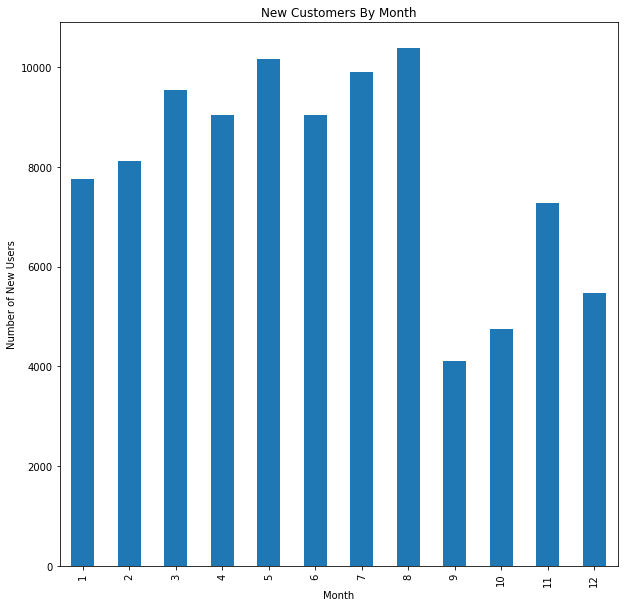

In [60]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
new_customers_by_month.plot(kind = 'bar', ax = ax)
ax.set_title('New Customers By Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of New Users')

In [61]:
# What date range do we have here for first order (the day the customer converted for the first tim)e?

df.date_first_order.min()

Timestamp('2016-09-04 21:15:19')

In [62]:
# Last conversion in data set

df.date_first_order.max()

Timestamp('2018-08-29 15:00:37')

In [63]:
# To have a better sense, perhaps we should add the year


new_customers_by_month_year = df.groupby(['year_first_order','month_first_order']).count().customer_unique_id
new_customers_by_month_year

year_first_order  month_first_order
2016              9                       1
                  10                    297
                  12                      1
2017              1                     762
                  2                    1735
                  3                    2603
                  4                    2334
                  5                    3571
                  6                    3126
                  7                    3868
                  8                    4162
                  9                    4112
                  10                   4446
                  11                   7270
                  12                   5478
2018              1                    6992
                  2                    6383
                  3                    6946
                  4                    6700
                  5                    6600
                  6                    5923
                  7                    6

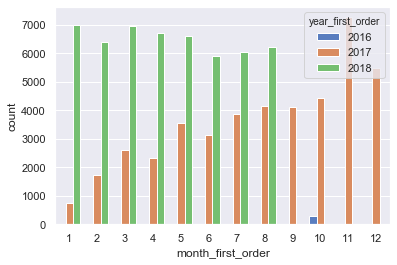

In [64]:
sns.set(style="darkgrid")
ax = sns.countplot(x="month_first_order", hue = "year_first_order", data=df, palette = "muted")

#### Oh Oh! In 2017, new users per month continued to go up but it seems to be stalling in 2018. 

In [65]:
# is average number of new customers increasing per year

new_customers_by_year = df.groupby('year_first_order').count().customer_unique_id
new_customers_by_year

year_first_order
2016      299
2017    43467
2018    51791
Name: customer_unique_id, dtype: int64

Text(0, 0.5, 'Number of New Users')

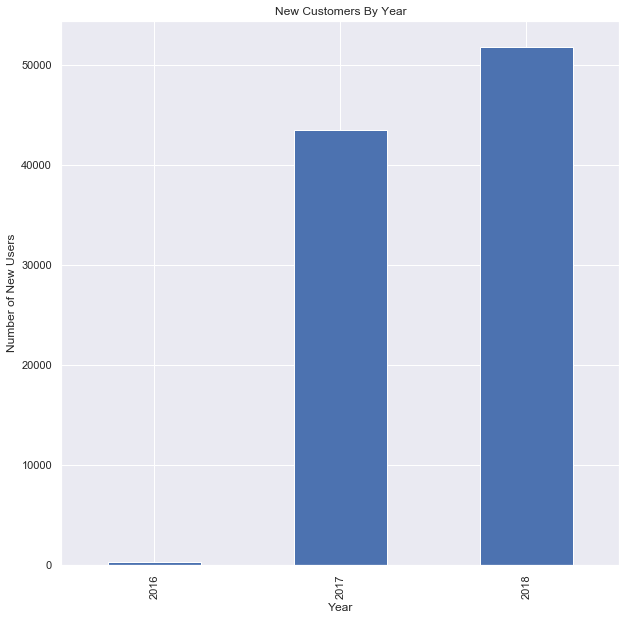

In [66]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
new_customers_by_year.plot(kind = 'bar', ax = ax)
ax.set_title('New Customers By Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of New Users')

#### Good news! Even though we don't have all the data for the last 4 months of 2018. The total number of new users for January - August 29 is already higher than all of 207

In [67]:
df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,...,avg_days_seller_processing_time,avg_days_transit_time,avg_days_lead_time,avg_days_survey_lag,avg_daysreview_lag,Active?,perc_orders_unavailable,perc_orders_shipped_late,perc_orders_boleto_voucher,perc_orders_credit_debit
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22,0,0 days 00:00:00,2 days 15:53:27,23 days 01:40:17,...,2.0,23.0,25.0,0.0,1.0,0,0.0,1.0,0.0,0.0
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62,0,0 days 00:19:36,0 days 23:38:38,19 days 01:14:46,...,0.0,19.0,20.0,0.0,1.0,0,0.0,1.0,0.0,0.0
2,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018,4,1,35.38,0,4 days 14:53:50,5 days 02:27:37,1 days 20:43:59,...,5.0,1.0,6.0,0.0,4.0,0,0.0,1.0,1.0,1.0
3,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018,2,1,419.18,0,0 days 00:17:01,1 days 08:53:49,14 days 22:53:21,...,1.0,14.0,16.0,0.0,1.0,0,0.0,1.0,0.0,0.0
4,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017,3,1,150.12,0,0 days 00:11:14,1 days 05:41:55,3 days 03:19:01,...,1.0,3.0,4.0,0.0,6.0,0,0.0,1.0,0.0,0.0


In [68]:
# average 6-month revenue split by year 

df["total_paid_first_6_months"].mean()

df.groupby('year_first_order').mean().total_paid_first_6_months

year_first_order
2016    180.906254
2017    165.938862
2018    164.331186
Name: total_paid_first_6_months, dtype: float64

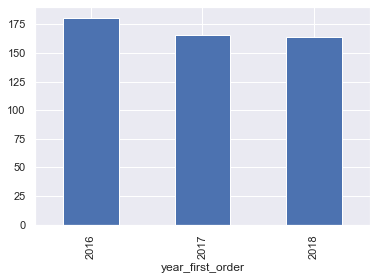

In [69]:
df.groupby('year_first_order').mean().total_paid_first_6_months.plot.bar()

#### Oh Oh! Average first 6 months decreasing YOY

In [70]:
# average number of orders by customer of first 6 month YOY 

df.groupby('year_first_order').mean().total_orders_first_6_months

year_first_order
2016    1.013378
2017    1.035521
2018    1.021259
Name: total_orders_first_6_months, dtype: float64

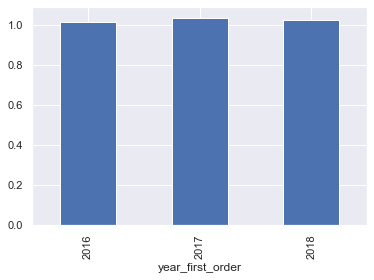

In [71]:
df.groupby('year_first_order').mean().total_orders_first_6_months.plot.bar()

#### Consistent YOY

In [72]:
# average 6-month revenue split by month

df["total_paid_first_6_months"].mean()

df.groupby('month_first_order').mean().total_paid_first_6_months

month_first_order
1     160.121118
2     157.383221
3     167.333929
4     172.468507
5     169.986005
6     166.479152
7     163.113787
8     158.598298
9     176.765349
10    173.505880
11    163.445842
12    158.502473
Name: total_paid_first_6_months, dtype: float64

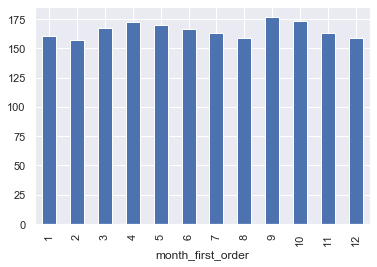

In [73]:
df.groupby('month_first_order').mean().total_paid_first_6_months.plot.bar()

#### Avg 6mo revenue fluctuates per month. Doesn't seem super significant

In [74]:
# Now, let's look at the day of the week when the customer was acquired

df['day_first_order'] = df['date_first_order'].dt.dayofweek

In [75]:
df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,...,avg_days_transit_time,avg_days_lead_time,avg_days_survey_lag,avg_daysreview_lag,Active?,perc_orders_unavailable,perc_orders_shipped_late,perc_orders_boleto_voucher,perc_orders_credit_debit,day_first_order
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22,0,0 days 00:00:00,2 days 15:53:27,23 days 01:40:17,...,23.0,25.0,0.0,1.0,0,0.0,1.0,0.0,0.0,4
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62,0,0 days 00:19:36,0 days 23:38:38,19 days 01:14:46,...,19.0,20.0,0.0,1.0,0,0.0,1.0,0.0,0.0,3
2,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018,4,1,35.38,0,4 days 14:53:50,5 days 02:27:37,1 days 20:43:59,...,1.0,6.0,0.0,4.0,0,0.0,1.0,1.0,1.0,4
3,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018,2,1,419.18,0,0 days 00:17:01,1 days 08:53:49,14 days 22:53:21,...,14.0,16.0,0.0,1.0,0,0.0,1.0,0.0,0.0,2
4,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017,3,1,150.12,0,0 days 00:11:14,1 days 05:41:55,3 days 03:19:01,...,3.0,4.0,0.0,6.0,0,0.0,1.0,0.0,0.0,5


In [76]:
def dayofweek(row):
    if row['day_first_order'] == 0:
        return 'Monday'
    elif row['day_first_order'] == 1:
        return 'Tuesday'
    elif row['day_first_order'] == 2:
        return 'Wednesday'
    elif row['day_first_order'] == 3:
        return 'Thursday'
    elif row['day_first_order'] == 4:
        return 'Friday'
    elif row['day_first_order'] == 5:
        return 'Saturday'
    elif row['day_first_order'] == 6:
        return 'Sunday'

df.loc[:,'day_first_order'] = df.apply(dayofweek, axis=1)

df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,...,avg_days_transit_time,avg_days_lead_time,avg_days_survey_lag,avg_daysreview_lag,Active?,perc_orders_unavailable,perc_orders_shipped_late,perc_orders_boleto_voucher,perc_orders_credit_debit,day_first_order
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22,0,0 days 00:00:00,2 days 15:53:27,23 days 01:40:17,...,23.0,25.0,0.0,1.0,0,0.0,1.0,0.0,0.0,Friday
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62,0,0 days 00:19:36,0 days 23:38:38,19 days 01:14:46,...,19.0,20.0,0.0,1.0,0,0.0,1.0,0.0,0.0,Thursday
2,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018,4,1,35.38,0,4 days 14:53:50,5 days 02:27:37,1 days 20:43:59,...,1.0,6.0,0.0,4.0,0,0.0,1.0,1.0,1.0,Friday
3,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018,2,1,419.18,0,0 days 00:17:01,1 days 08:53:49,14 days 22:53:21,...,14.0,16.0,0.0,1.0,0,0.0,1.0,0.0,0.0,Wednesday
4,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017,3,1,150.12,0,0 days 00:11:14,1 days 05:41:55,3 days 03:19:01,...,3.0,4.0,0.0,6.0,0,0.0,1.0,0.0,0.0,Saturday


In [77]:
new_customers_by_day_of_the_week = df.groupby('day_first_order').count().customer_unique_id
new_customers_by_day_of_the_week

day_first_order
Friday       13600
Monday       15556
Saturday     10446
Sunday       11492
Thursday     14157
Tuesday      15347
Wednesday    14959
Name: customer_unique_id, dtype: int64

Text(0, 0.5, 'Number of New Users')

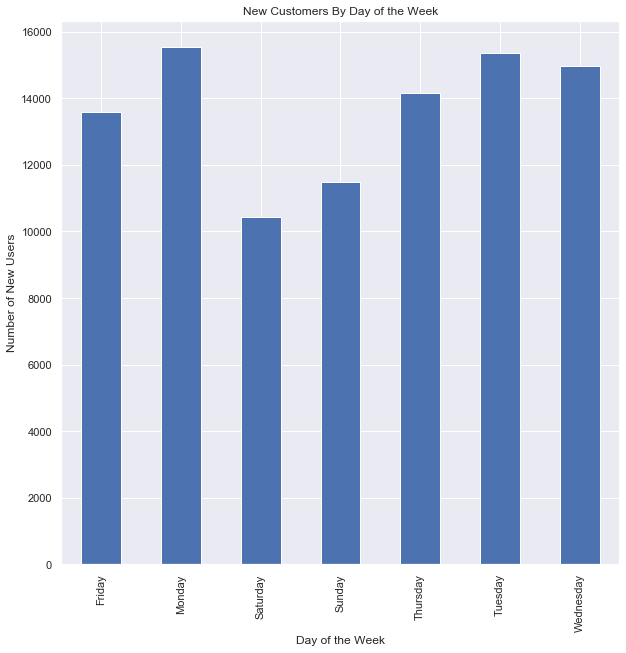

In [78]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
new_customers_by_day_of_the_week.plot(kind = 'bar', ax = ax)
ax.set_title('New Customers By Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of New Users')

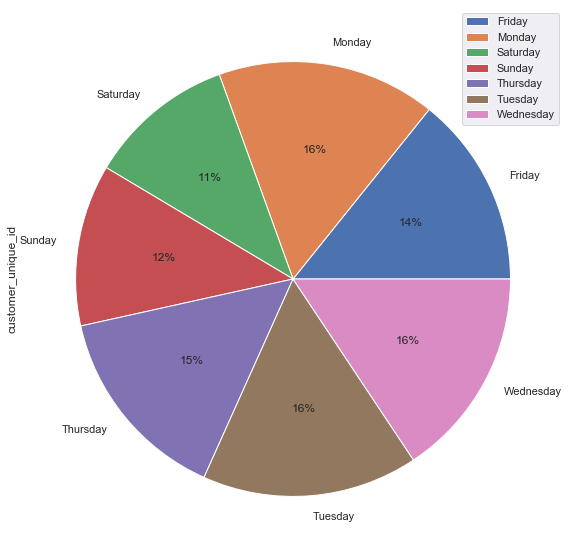

In [79]:
dfs = pd.DataFrame(new_customers_by_day_of_the_week)
plot = dfs.plot.pie(subplots = True, figsize=(10, 10), autopct='%1.0f%%')

#### The difference between the first day of the order place is mild. The only observation is that the bottom 2 days of the weeks with the least amount of new uses were actually Saturday and Sunday. So, there is a higher chance of adding new customers on weekdays instead of weekdays

### New Customer Demographics

In [80]:
# Upload data with state

customer_demo = pd.read_csv('customer_demographics.csv',na_values=['NULL'],encoding='latin-1')

In [81]:
customer_demo.head()

,customer_unique_id,customer_state,customer_zip_code
0,0f6b5c99a18002587ce3016b74990606,MG,38610
1,0527504d9e51e19c4f352774078872f0,CE,60349
2,f970695774455214d343a537cd2472cf,ES,29216
3,fee6e134e5709ca3b2496610ad7c4172,MG,38800
4,93bf7b89c7c76b368a61b9d0b2c721b7,PR,87370


In [82]:
# There are dupes in table. Should be dropped

customer_demo.drop_duplicates(subset ="customer_unique_id", 
                     keep = False, inplace = True) 

In [83]:
customer_demo.shape

(95391, 3)

In [84]:
customers_by_state = customer_demo.groupby("customer_state").count().customer_unique_id
customers_by_state

customer_state
AC       77
AL      398
AM      143
AP       67
BA     3259
CE     1304
DF     2065
ES     1948
GO     1939
MA      719
MG    11180
MS      692
MT      872
PA      945
PB      517
PE     1598
PI      478
PR     4855
RJ    12278
RN      473
RO      236
RR       44
RS     5247
SC     3512
SE      340
SP    39933
TO      272
Name: customer_unique_id, dtype: int64

Text(0, 0.5, 'Number of Users')

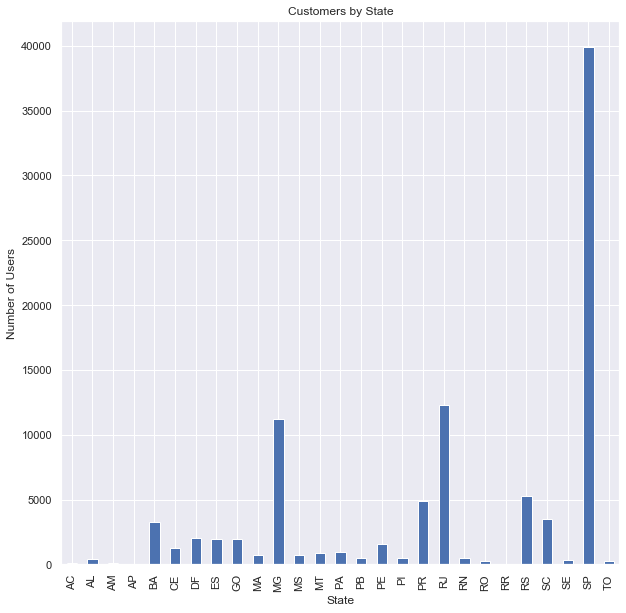

In [85]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
customers_by_state.plot(kind = 'bar', ax = ax)
ax.set_title('Customers by State')
ax.set_xlabel('State')
ax.set_ylabel('Number of Users')

#### The difference between states is quite drastic. Understandably, Sao Paulo is the biggest one but the second most popular state Rio de Janeiro has about half the population but a much smaller percentage of users. Olist should consider looking at why either the SP region is more likely to use the platform and/or why other regions wouldn't. State Data will be added to the customer dataframe for first 6 months.

In [86]:
df['perc_orders_unavailable'].mean()

0.006143221090843975

In [87]:
df.groupby('year_first_order').mean().perc_orders_unavailable

year_first_order
2016    0.023411
2017    0.010238
2018    0.002607
Name: perc_orders_unavailable, dtype: float64

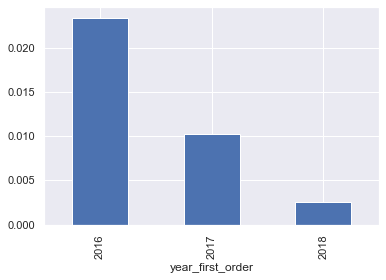

In [88]:
df.groupby('year_first_order').mean().perc_orders_unavailable.plot.bar()

In [89]:
df['perc_orders_shipped_late'].mean()

0.8970973694583687

In [90]:
df.groupby('year_first_order').mean().perc_orders_shipped_late

year_first_order
2016    0.081940
2017    0.888298
2018    0.909189
Name: perc_orders_shipped_late, dtype: float64

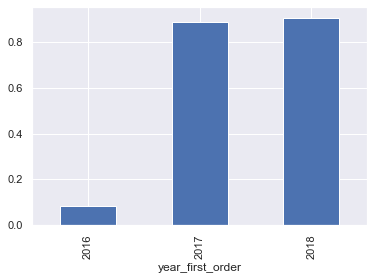

In [91]:
df.groupby('year_first_order').mean().perc_orders_shipped_late.plot.bar()

In [92]:
df['avg_freight_cost_per_order'].mean()

20.89990360867195

In [93]:
df.groupby('year_first_order').mean().avg_freight_cost_per_order

year_first_order
2016    21.407056
2017    20.269543
2018    21.426023
Name: avg_freight_cost_per_order, dtype: float64

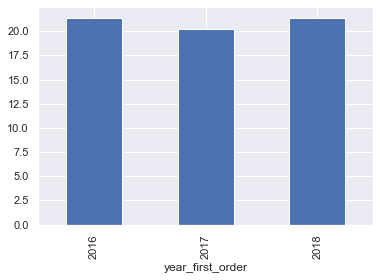

In [94]:
df.groupby('year_first_order').mean().avg_freight_cost_per_order.plot.bar()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 37 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95557 non-null timedelta64[ns]
avg_seller_processing_time                    95557 non-null timedelta64[ns]
avg_transit_time                              95557 non-null timedelta64[ns]
avg_lead_time                                 95557 non-null timedelta64[ns]
avg_item_count_per_order                      95557 non-null float64
avg_product_count_per_order      

In [96]:
df['avg_days_payment_processing_time'].mean()

0.2675898595323327

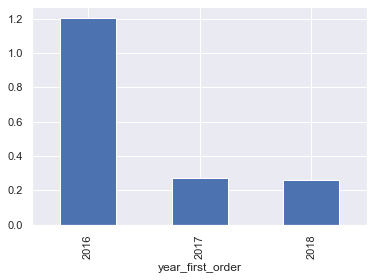

In [97]:
df.groupby('year_first_order').mean().avg_days_payment_processing_time.plot.bar()

In [98]:
df['avg_days_seller_processing_time'].mean()

2.7421166031607886

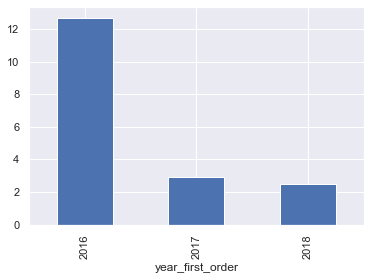

In [99]:
df.groupby('year_first_order').mean().avg_days_seller_processing_time.plot.bar()

In [100]:
df['avg_days_transit_time'].mean()

8.888067219685764

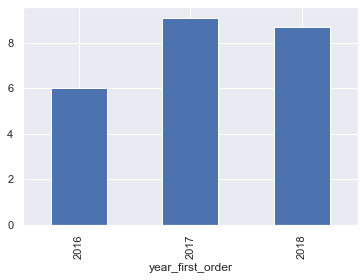

In [101]:
df.groupby('year_first_order').mean().avg_days_transit_time.plot.bar()

In [102]:
df['avg_days_lead_time'].mean()

12.097110161046643

In [103]:
df.groupby('year_first_order').mean().avg_days_lead_time

year_first_order
2016    18.242461
2017    12.539647
2018    11.690221
Name: avg_days_lead_time, dtype: float64

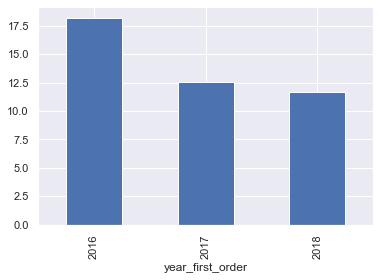

In [104]:
df.groupby('year_first_order').mean().avg_days_lead_time.plot.bar()

In [105]:
df['avg_daysreview_lag'].mean()

3.1394705160949155

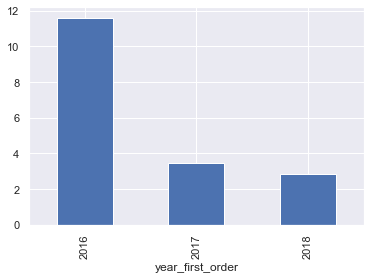

In [106]:
df.groupby('year_first_order').mean().avg_daysreview_lag.plot.bar()

In [107]:
df['avg_review_score'].mean()

4.083128568986748

In [108]:
df.groupby('year_first_order').mean().avg_review_score

year_first_order
2016    3.686176
2017    4.081108
2018    4.087116
Name: avg_review_score, dtype: float64

In [109]:
df['avg_item_count_per_order'].mean()

1.1387111534935241

In [110]:
df['avg_product_count_per_order'].mean()

1.0369513307509477

In [111]:
df['average_price_per_unit'].mean()

125.51914818018173

In [112]:
df['ordered_from_top_10_prod_category_bol'].value_counts()

1    60222
0    35335
Name: ordered_from_top_10_prod_category_bol, dtype: int64

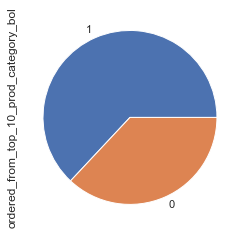

In [113]:
df['ordered_from_top_10_prod_category_bol'].value_counts().plot.pie()

In [114]:
60222/95557

0.6302207059660726

In [115]:
df['ordered_from_seller_perfect_avg_review_bol'].value_counts()

0    94620
1      937
Name: ordered_from_seller_perfect_avg_review_bol, dtype: int64

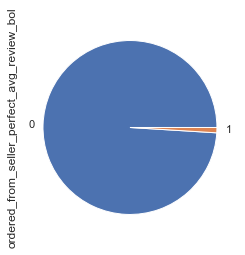

In [116]:
df['ordered_from_seller_perfect_avg_review_bol'].value_counts().plot.pie()

In [117]:
df['avg_installments'].mean()

2.967344372369122

In [132]:
df.groupby('year_first_order').mean().avg_installments

year_first_order
2016    3.673913
2017    3.143434
2018    2.815477
Name: avg_installments, dtype: float64

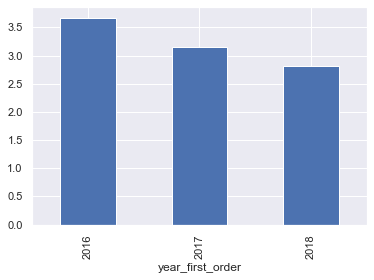

In [133]:
df.groupby('year_first_order').mean().avg_installments.plot.bar()

In [134]:
df['perc_orders_boleto_voucher'].mean()

0.2562088347169503

In [135]:
df.groupby('year_first_order').mean().perc_orders_boleto_voucher

year_first_order
2016    0.274247
2017    0.277085
2018    0.238584
Name: perc_orders_boleto_voucher, dtype: float64

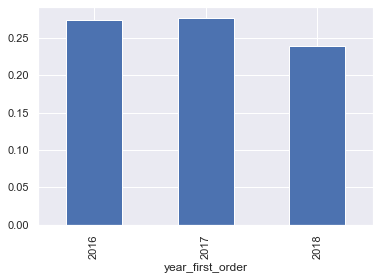

In [136]:
df.groupby('year_first_order').mean().perc_orders_boleto_voucher.plot.bar()

In [137]:
df['average_price_per_unit'].mean()

125.51914818018173

In [138]:
df.groupby('year_first_order').mean().average_price_per_unit

year_first_order
2016    141.085115
2017    125.190908
2018    125.704767
Name: average_price_per_unit, dtype: float64

In [140]:
141.085115-125.704767

15.380347999999998

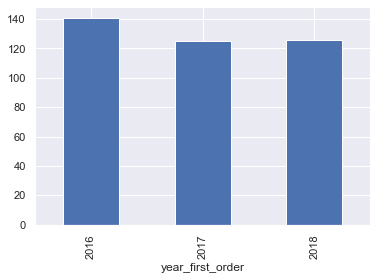

In [139]:
df.groupby('year_first_order').mean().average_price_per_unit.plot.bar()

# REGRESSION LTV MODEL 

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 37 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95557 non-null timedelta64[ns]
avg_seller_processing_time                    95557 non-null timedelta64[ns]
avg_transit_time                              95557 non-null timedelta64[ns]
avg_lead_time                                 95557 non-null timedelta64[ns]
avg_item_count_per_order                      95557 non-null float64
avg_product_count_per_order      

In [119]:
# first_linear_regression
# had to remove timedelta


formula1 = 'total_paid_first_6_months ~ perc_orders_unavailable + avg_review_score + C(month_first_order) + avg_item_count_per_order + avg_product_count_per_order + average_price_per_unit + avg_freight_cost_per_order + C(ordered_from_top_10_prod_category_bol) + C(ordered_from_seller_perfect_avg_review_bol) + avg_installments + perc_orders_shipped_late + perc_orders_boleto_voucher'
fitted_model1 = smf.ols(formula=formula1, data=df).fit()
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_paid_first_6_months   R-squared:                       0.877
Model:                                   OLS   Adj. R-squared:                  0.877
Method:                        Least Squares   F-statistic:                 3.089e+04
Date:                       Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                               10:01:21   Log-Likelihood:            -5.5397e+05
No. Observations:                      95557   AIC:                         1.108e+06
Df Residuals:                          95534   BIC:                         1.108e+06
Df Model:                                 22                                         
Covariance Type:                   nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                            -89.2818      1.945    -45.903      0.000     -93.094     -85.470
C(month_first_order)[T.2]                             -0.0388      1.267     -0.031      0.976      -2.522       2.444
C(month_first_order)[T.3]                              0.1672      1.220      0.137      0.891      -2.225       2.559
C(month_first_order)[T.4]                             -0.4776      1.235     -0.387      0.699      -2.899       1.944
C(month_first_order)[T.5]                              1.0265      1.203      0.853      0.394      -1.332       3.385
C(month_first_order)[T.6]                             -2.0731      1.236     -1.677      0.094      -4.496       0.350
C(month_first_order)[T.7]                             -0.4061      1.211     -0.335      0.737      -2.780       1.967
C(month_first_order)[T.8]                             -1.5415      1.198     -1.286      0.198      -3.890       0.807
C(month_first_order)[T.9]                              5.8527      1.539      3.803      0.000       2.836       8.869
C(month_first_order)[T.10]                            -1.8868      1.470     -1.283      0.199      -4.768       0.995
C(month_first_order)[T.11]                             0.2644      1.302      0.203      0.839      -2.288       2.817
C(month_first_order)[T.12]                            -0.1119      1.407     -0.080      0.937      -2.870       2.646
C(ordered_from_top_10_prod_category_bol)[T.1]          2.2730      0.540      4.213      0.000       1.216       3.330
C(ordered_from_seller_perfect_avg_review_bol)[T.1]    -1.2899      2.627     -0.491      0.623      -6.440       3.860
perc_orders_unavailable                              177.5627      3.456     51.376      0.000     170.789     184.337
avg_review_score                                      -0.2671      0.200     -1.337      0.181      -0.659       0.124
avg_item_count_per_order                             104.7951      0.560    187.250      0.000     103.698     105.892
avg_product_count_per_order                          -24.0295      1.368    -17.566      0.000     -26.711     -21.348
average_price_per_unit                                 1.0420      0.002    673.569      0.000       1.039       1.045
avg_freight_cost_per_order                             1.2655      0.017     73.331      0.000       1.232       1.299
avg_installments                                       0.7602      0.103      7.348      0.000       0.557       0.963
perc_orders_shipped_late                              -1.3082      0.891     -1.468      0.142      -3.054       0.438
perc_orders_boleto_voucher     

In [120]:
# R-squared solid, but missing timedelta variables (including how long does it take from order to delivery which could be important)
# timedelta variables were changed to days (integers) in SQL and added to source df
# 28 variables

formula2 = 'total_paid_first_6_months ~ perc_orders_unavailable + avg_review_score + C(month_first_order) + avg_item_count_per_order + avg_product_count_per_order + average_price_per_unit + avg_freight_cost_per_order + C(ordered_from_top_10_prod_category_bol) + C(ordered_from_seller_perfect_avg_review_bol) + avg_installments + perc_orders_shipped_late + perc_orders_boleto_voucher + avg_days_payment_processing_time + avg_days_seller_processing_time + avg_days_transit_time + avg_days_lead_time + avg_days_survey_lag + avg_daysreview_lag'
fitted_model2 = smf.ols(formula=formula2, data=df).fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_paid_first_6_months   R-squared:                       0.877
Model:                                   OLS   Adj. R-squared:                  0.877
Method:                        Least Squares   F-statistic:                 2.428e+04
Date:                       Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                               10:01:23   Log-Likelihood:            -5.5394e+05
No. Observations:                      95557   AIC:                         1.108e+06
Df Residuals:                          95528   BIC:                         1.108e+06
Df Model:                                 28                                         
Covariance Type:                   nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                            -90.4076      2.229    -40.561      0.000     -94.776     -86.039
C(month_first_order)[T.2]                              0.1085      1.268      0.086      0.932      -2.377       2.594
C(month_first_order)[T.3]                              0.3737      1.221      0.306      0.759      -2.019       2.766
C(month_first_order)[T.4]                             -0.5319      1.237     -0.430      0.667      -2.956       1.892
C(month_first_order)[T.5]                              1.0801      1.205      0.896      0.370      -1.282       3.442
C(month_first_order)[T.6]                             -2.1007      1.241     -1.693      0.090      -4.533       0.331
C(month_first_order)[T.7]                             -0.5198      1.216     -0.427      0.669      -2.904       1.864
C(month_first_order)[T.8]                             -1.6314      1.206     -1.353      0.176      -3.994       0.732
C(month_first_order)[T.9]                              5.7645      1.540      3.744      0.000       2.747       8.782
C(month_first_order)[T.10]                            -2.2443      1.472     -1.524      0.127      -5.130       0.641
C(month_first_order)[T.11]                             0.1251      1.303      0.096      0.923      -2.428       2.678
C(month_first_order)[T.12]                            -0.1451      1.407     -0.103      0.918      -2.904       2.614
C(ordered_from_top_10_prod_category_bol)[T.1]          2.2848      0.540      4.235      0.000       1.227       3.342
C(ordered_from_seller_perfect_avg_review_bol)[T.1]    -1.4088      2.627     -0.536      0.592      -6.558       3.740
perc_orders_unavailable                              178.2758      3.515     50.713      0.000     171.386     185.166
avg_review_score                                      -0.3706      0.209     -1.775      0.076      -0.780       0.039
avg_item_count_per_order                             104.6512      0.561    186.695      0.000     103.553     105.750
avg_product_count_per_order                          -24.1024      1.373    -17.560      0.000     -26.793     -21.412
average_price_per_unit                                 1.0416      0.002    671.820      0.000       1.039       1.045
avg_freight_cost_per_order                             1.2724      0.018     72.091      0.000       1.238       1.307
avg_installments                                       0.7763      0.104      7.488      0.000       0.573       0.979
perc_orders_shipped_late                               0.0272      1.070      0.025      0.980      -2.069       2.124
perc_orders_boleto_voucher     

In [121]:
# try without month

formula3 = 'total_paid_first_6_months ~ perc_orders_unavailable + avg_review_score + avg_item_count_per_order + avg_product_count_per_order + average_price_per_unit + avg_freight_cost_per_order + C(ordered_from_top_10_prod_category_bol) + C(ordered_from_seller_perfect_avg_review_bol) + avg_installments + perc_orders_shipped_late + perc_orders_boleto_voucher + avg_days_payment_processing_time + avg_days_seller_processing_time + avg_days_transit_time + avg_days_lead_time + avg_days_survey_lag + avg_daysreview_lag'
fitted_model3 = smf.ols(formula=formula3, data=df).fit()
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_paid_first_6_months   R-squared:                       0.877
Model:                                   OLS   Adj. R-squared:                  0.877
Method:                        Least Squares   F-statistic:                 3.998e+04
Date:                       Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                               10:01:24   Log-Likelihood:            -5.5396e+05
No. Observations:                      95557   AIC:                         1.108e+06
Df Residuals:                          95539   BIC:                         1.108e+06
Df Model:                                 17                                         
Covariance Type:                   nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                            -90.8632      2.043    -44.485      0.000     -94.867     -86.860
C(ordered_from_top_10_prod_category_bol)[T.1]          2.2844      0.539      4.236      0.000       1.227       3.342
C(ordered_from_seller_perfect_avg_review_bol)[T.1]    -1.6968      2.625     -0.646      0.518      -6.843       3.449
perc_orders_unavailable                              178.5501      3.513     50.820      0.000     171.664     185.436
avg_review_score                                      -0.3685      0.209     -1.766      0.077      -0.777       0.040
avg_item_count_per_order                             104.6715      0.561    186.743      0.000     103.573     105.770
avg_product_count_per_order                          -24.0692      1.372    -17.539      0.000     -26.759     -21.380
average_price_per_unit                                 1.0417      0.002    672.283      0.000       1.039       1.045
avg_freight_cost_per_order                             1.2680      0.018     72.185      0.000       1.234       1.302
avg_installments                                       0.7817      0.104      7.548      0.000       0.579       0.985
perc_orders_shipped_late                               0.1272      1.069      0.119      0.905      -1.967       2.222
perc_orders_boleto_voucher                             1.2972      0.486      2.667      0.008       0.344       2.250
avg_days_payment_processing_time                       0.3425      0.273      1.253      0.210      -0.193       0.878
avg_days_seller_processing_time                       -1.0748      0.286     -3.764      0.000      -1.634      -0.515
avg_days_transit_time                                 -1.3662      0.278     -4.909      0.000      -1.912      -0.821
avg_days_lead_time                                     1.2941      0.278      4.659      0.000       0.750       1.838
avg_days_survey_lag                                    1.0570      0.216      4.900      0.000       0.634       1.480
avg_daysreview_lag                                    -0.0258      0.027     -0.969      0.332      -0.078       0.026
==============================================================================
Omnibus:                   284094.462   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      82307714169.592
Skew:                          42.208   Prob(JB):                         0.00
Kurtosis:                    4548.899   Cond. No.                     3.19e+03
==============================================================================

Warnings:
[1] Standard Errors as

In [122]:
# attempt without perc orders shipped late

formula4 = 'total_paid_first_6_months ~ perc_orders_unavailable + avg_review_score + avg_item_count_per_order + avg_product_count_per_order + average_price_per_unit + avg_freight_cost_per_order + C(ordered_from_top_10_prod_category_bol) + C(ordered_from_seller_perfect_avg_review_bol) + avg_installments + perc_orders_boleto_voucher + avg_days_payment_processing_time + avg_days_seller_processing_time + avg_days_transit_time + avg_days_lead_time + avg_days_survey_lag + avg_daysreview_lag'
fitted_model4 = smf.ols(formula=formula4, data=df).fit()
fitted_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_paid_first_6_months   R-squared:                       0.877
Model:                                   OLS   Adj. R-squared:                  0.877
Method:                        Least Squares   F-statistic:                 4.248e+04
Date:                       Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                               10:01:25   Log-Likelihood:            -5.5396e+05
No. Observations:                      95557   AIC:                         1.108e+06
Df Residuals:                          95540   BIC:                         1.108e+06
Df Model:                                 16                                         
Covariance Type:                   nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                            -90.7424      1.772    -51.196      0.000     -94.216     -87.268
C(ordered_from_top_10_prod_category_bol)[T.1]          2.2844      0.539      4.236      0.000       1.227       3.342
C(ordered_from_seller_perfect_avg_review_bol)[T.1]    -1.7006      2.625     -0.648      0.517      -6.846       3.445
perc_orders_unavailable                              178.4385      3.386     52.700      0.000     171.802     185.075
avg_review_score                                      -0.3667      0.208     -1.762      0.078      -0.774       0.041
avg_item_count_per_order                             104.6716      0.561    186.745      0.000     103.573     105.770
avg_product_count_per_order                          -24.0688      1.372    -17.539      0.000     -26.759     -21.379
average_price_per_unit                                 1.0417      0.002    672.288      0.000       1.039       1.045
avg_freight_cost_per_order                             1.2681      0.018     72.198      0.000       1.234       1.303
avg_installments                                       0.7817      0.104      7.548      0.000       0.579       0.985
perc_orders_boleto_voucher                             1.2992      0.486      2.673      0.008       0.346       2.252
avg_days_payment_processing_time                       0.3449      0.273      1.265      0.206      -0.190       0.879
avg_days_seller_processing_time                       -1.0807      0.281     -3.843      0.000      -1.632      -0.530
avg_days_transit_time                                 -1.3661      0.278     -4.909      0.000      -1.912      -0.821
avg_days_lead_time                                     1.2940      0.278      4.659      0.000       0.750       1.838
avg_days_survey_lag                                    1.0563      0.216      4.899      0.000       0.634       1.479
avg_daysreview_lag                                    -0.0258      0.027     -0.969      0.332      -0.078       0.026
==============================================================================
Omnibus:                   284093.120   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      82304151402.546
Skew:                          42.207   Prob(JB):                         0.00
Kurtosis:                    4548.800   Cond. No.                     3.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This

In [123]:
# attempt without perfect seller  bol

formula5 = 'total_paid_first_6_months ~ perc_orders_unavailable + avg_review_score + avg_item_count_per_order + avg_product_count_per_order + average_price_per_unit + avg_freight_cost_per_order + C(ordered_from_top_10_prod_category_bol) + avg_installments + perc_orders_boleto_voucher + avg_days_payment_processing_time + avg_days_seller_processing_time + avg_days_transit_time + avg_days_lead_time + avg_days_survey_lag + avg_daysreview_lag'
fitted_model5 = smf.ols(formula=formula5, data=df).fit()
fitted_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_paid_first_6_months   R-squared:                       0.877
Model:                                   OLS   Adj. R-squared:                  0.877
Method:                        Least Squares   F-statistic:                 4.532e+04
Date:                       Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                               10:01:26   Log-Likelihood:            -5.5396e+05
No. Observations:                      95557   AIC:                         1.108e+06
Df Residuals:                          95541   BIC:                         1.108e+06
Df Model:                                 15                                         
Covariance Type:                   nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       -90.7285      1.772    -51.192      0.000     -94.202     -87.255
C(ordered_from_top_10_prod_category_bol)[T.1]     2.2909      0.539      4.248      0.000       1.234       3.348
perc_orders_unavailable                         178.4364      3.386     52.699      0.000     171.800     185.073
avg_review_score                                 -0.3748      0.208     -1.804      0.071      -0.782       0.032
avg_item_count_per_order                        104.6648      0.560    186.767      0.000     103.566     105.763
avg_product_count_per_order                     -24.0614      1.372    -17.534      0.000     -26.751     -21.372
average_price_per_unit                            1.0417      0.002    672.339      0.000       1.039       1.045
avg_freight_cost_per_order                        1.2679      0.018     72.199      0.000       1.233       1.302
avg_installments                                  0.7819      0.104      7.550      0.000       0.579       0.985
perc_orders_boleto_voucher                        1.3005      0.486      2.675      0.007       0.348       2.253
avg_days_payment_processing_time                  0.3454      0.273      1.267      0.205      -0.189       0.880
avg_days_seller_processing_time                  -1.0816      0.281     -3.846      0.000      -1.633      -0.530
avg_days_transit_time                            -1.3669      0.278     -4.912      0.000      -1.912      -0.821
avg_days_lead_time                                1.2952      0.278      4.663      0.000       0.751       1.840
avg_days_survey_lag                               1.0545      0.216      4.891      0.000       0.632       1.477
avg_daysreview_lag                               -0.0259      0.027     -0.971      0.332      -0.078       0.026
==============================================================================
Omnibus:                   284094.555   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      82306778191.505
Skew:                          42.208   Prob(JB):                         0.00
Kurtosis:                    4548.873   Cond. No.                     3.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
# attempt without avg_days payment_processing_time

formula6 = 'total_paid_first_6_months ~ perc_orders_unavailable + avg_review_score + avg_item_count_per_order + avg_product_count_per_order + average_price_per_unit + avg_freight_cost_per_order + C(ordered_from_top_10_prod_category_bol) + avg_installments + perc_orders_boleto_voucher + avg_days_seller_processing_time + avg_days_transit_time + avg_days_lead_time + avg_days_survey_lag + avg_daysreview_lag'
fitted_model6 = smf.ols(formula=formula6, data=df).fit()
fitted_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_paid_first_6_months   R-squared:                       0.877
Model:                                   OLS   Adj. R-squared:                  0.877
Method:                        Least Squares   F-statistic:                 4.855e+04
Date:                       Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                               10:01:27   Log-Likelihood:            -5.5396e+05
No. Observations:                      95557   AIC:                         1.108e+06
Df Residuals:                          95542   BIC:                         1.108e+06
Df Model:                                 14                                         
Covariance Type:                   nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       -90.7062      1.772    -51.182      0.000     -94.180     -87.233
C(ordered_from_top_10_prod_category_bol)[T.1]     2.2945      0.539      4.255      0.000       1.238       3.351
perc_orders_unavailable                         178.6340      3.382     52.813      0.000     172.005     185.263
avg_review_score                                 -0.3732      0.208     -1.797      0.072      -0.780       0.034
avg_item_count_per_order                        104.6743      0.560    186.800      0.000     103.576     105.773
avg_product_count_per_order                     -24.0621      1.372    -17.535      0.000     -26.752     -21.373
average_price_per_unit                            1.0418      0.002    672.472      0.000       1.039       1.045
avg_freight_cost_per_order                        1.2682      0.018     72.221      0.000       1.234       1.303
avg_installments                                  0.7747      0.103      7.492      0.000       0.572       0.977
perc_orders_boleto_voucher                        1.4223      0.476      2.985      0.003       0.488       2.356
avg_days_seller_processing_time                  -1.0674      0.281     -3.799      0.000      -1.618      -0.517
avg_days_transit_time                            -1.3631      0.278     -4.898      0.000      -1.909      -0.818
avg_days_lead_time                                1.2916      0.278      4.651      0.000       0.747       1.836
avg_days_survey_lag                               1.0590      0.216      4.912      0.000       0.636       1.481
avg_daysreview_lag                               -0.0259      0.027     -0.973      0.331      -0.078       0.026
==============================================================================
Omnibus:                   284108.383   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      82343671334.521
Skew:                          42.213   Prob(JB):                         0.00
Kurtosis:                    4549.892   Cond. No.                     3.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
# attempt without days review lag

formula7 = 'total_paid_first_6_months ~ perc_orders_unavailable + avg_review_score + avg_item_count_per_order + avg_product_count_per_order + average_price_per_unit + avg_freight_cost_per_order + C(ordered_from_top_10_prod_category_bol) + avg_installments + perc_orders_boleto_voucher + avg_days_seller_processing_time + avg_days_transit_time + avg_days_lead_time + avg_days_survey_lag'
fitted_model7 = smf.ols(formula=formula7, data=df).fit()
fitted_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_paid_first_6_months   R-squared:                       0.877
Model:                                   OLS   Adj. R-squared:                  0.877
Method:                        Least Squares   F-statistic:                 5.229e+04
Date:                       Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                               10:01:28   Log-Likelihood:            -5.5396e+05
No. Observations:                      95557   AIC:                         1.108e+06
Df Residuals:                          95543   BIC:                         1.108e+06
Df Model:                                 13                                         
Covariance Type:                   nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       -90.7777      1.771    -51.266      0.000     -94.248     -87.307
C(ordered_from_top_10_prod_category_bol)[T.1]     2.2960      0.539      4.258      0.000       1.239       3.353
perc_orders_unavailable                         178.6349      3.382     52.814      0.000     172.006     185.264
avg_review_score                                 -0.3735      0.208     -1.798      0.072      -0.781       0.034
avg_item_count_per_order                        104.6744      0.560    186.800      0.000     103.576     105.773
avg_product_count_per_order                     -24.0628      1.372    -17.535      0.000     -26.752     -21.373
average_price_per_unit                            1.0418      0.002    672.475      0.000       1.039       1.045
avg_freight_cost_per_order                        1.2682      0.018     72.220      0.000       1.234       1.303
avg_installments                                  0.7746      0.103      7.490      0.000       0.572       0.977
perc_orders_boleto_voucher                        1.4213      0.476      2.983      0.003       0.487       2.355
avg_days_seller_processing_time                  -1.0683      0.281     -3.802      0.000      -1.619      -0.518
avg_days_transit_time                            -1.3640      0.278     -4.902      0.000      -1.909      -0.819
avg_days_lead_time                                1.2921      0.278      4.652      0.000       0.748       1.836
avg_days_survey_lag                               1.0310      0.214      4.826      0.000       0.612       1.450
==============================================================================
Omnibus:                   284108.881   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      82343759553.237
Skew:                          42.214   Prob(JB):                         0.00
Kurtosis:                    4549.894   Cond. No.                     3.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
# attempt without average review score

formula8 = 'total_paid_first_6_months ~ perc_orders_unavailable + avg_item_count_per_order + avg_product_count_per_order + average_price_per_unit + avg_freight_cost_per_order + C(ordered_from_top_10_prod_category_bol) + avg_installments + perc_orders_boleto_voucher + avg_days_seller_processing_time + avg_days_transit_time + avg_days_lead_time + avg_days_survey_lag'
fitted_model8 = smf.ols(formula=formula8, data=df).fit()
fitted_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_paid_first_6_months   R-squared:                       0.877
Model:                                   OLS   Adj. R-squared:                  0.877
Method:                        Least Squares   F-statistic:                 5.664e+04
Date:                       Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                               10:01:28   Log-Likelihood:            -5.5396e+05
No. Observations:                      95557   AIC:                         1.108e+06
Df Residuals:                          95544   BIC:                         1.108e+06
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       -92.7899      1.372    -67.611      0.000     -95.480     -90.100
C(ordered_from_top_10_prod_category_bol)[T.1]     2.3119      0.539      4.288      0.000       1.255       3.369
perc_orders_unavailable                         179.6209      3.338     53.816      0.000     173.079     186.163
avg_item_count_per_order                        104.7614      0.558    187.655      0.000     103.667     105.856
avg_product_count_per_order                     -23.8962      1.369    -17.454      0.000     -26.580     -21.213
average_price_per_unit                            1.0418      0.002    672.494      0.000       1.039       1.045
avg_freight_cost_per_order                        1.2673      0.018     72.197      0.000       1.233       1.302
avg_installments                                  0.7760      0.103      7.504      0.000       0.573       0.979
perc_orders_boleto_voucher                        1.4128      0.476      2.965      0.003       0.479       2.347
avg_days_seller_processing_time                  -1.0578      0.281     -3.766      0.000      -1.608      -0.507
avg_days_transit_time                            -1.3576      0.278     -4.879      0.000      -1.903      -0.812
avg_days_lead_time                                1.3025      0.278      4.691      0.000       0.758       1.847
avg_days_survey_lag                               1.0362      0.214      4.850      0.000       0.617       1.455
==============================================================================
Omnibus:                   284112.843   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      82359323782.783
Skew:                          42.215   Prob(JB):                         0.00
Kurtosis:                    4550.324   Cond. No.                     2.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
# Would correlation be better if data was normalized?

df_z = df[['total_paid_first_6_months', 'ordered_from_top_10_prod_category_bol', 'ordered_from_seller_perfect_avg_review_bol', 'perc_orders_unavailable', 'avg_review_score', 'avg_item_count_per_order', 'avg_product_count_per_order', 'average_price_per_unit', 'avg_freight_cost_per_order', 'avg_installments','perc_orders_shipped_late', 'perc_orders_boleto_voucher', 'avg_days_payment_processing_time', 'avg_days_seller_processing_time', 'avg_days_transit_time', 'avg_days_lead_time', 'avg_days_survey_lag', 'avg_daysreview_lag' ]]

In [128]:
df_z.head()

,total_paid_first_6_months,ordered_from_top_10_prod_category_bol,ordered_from_seller_perfect_avg_review_bol,perc_orders_unavailable,avg_review_score,avg_item_count_per_order,avg_product_count_per_order,average_price_per_unit,avg_freight_cost_per_order,avg_installments,perc_orders_shipped_late,perc_orders_boleto_voucher,avg_days_payment_processing_time,avg_days_seller_processing_time,avg_days_transit_time,avg_days_lead_time,avg_days_survey_lag,avg_daysreview_lag
0,86.22,0,0,0.0,3.0,1.0,1.0,69.00,17.22,8.0,1.0,0.0,0.0,2.0,23.0,25.0,0.0,1.0
1,43.62,1,0,0.0,4.0,1.0,1.0,25.99,17.63,4.0,1.0,0.0,0.0,0.0,19.0,20.0,0.0,1.0
2,35.38,1,0,0.0,4.0,1.0,1.0,27.99,7.39,1.0,1.0,1.0,4.0,5.0,1.0,6.0,0.0,4.0
3,419.18,1,0,0.0,1.0,2.0,2.0,191.00,37.18,3.0,1.0,0.0,0.0,1.0,14.0,16.0,0.0,1.0
4,150.12,0,0,0.0,4.0,1.0,1.0,135.00,15.12,3.0,1.0,0.0,0.0,1.0,3.0,4.0,0.0,6.0


In [129]:
from scipy.stats import zscore
df_z.apply(zscore)

,total_paid_first_6_months,ordered_from_top_10_prod_category_bol,ordered_from_seller_perfect_avg_review_bol,perc_orders_unavailable,avg_review_score,avg_item_count_per_order,avg_product_count_per_order,average_price_per_unit,avg_freight_cost_per_order,avg_installments,perc_orders_shipped_late,perc_orders_boleto_voucher,avg_days_payment_processing_time,avg_days_seller_processing_time,avg_days_transit_time,avg_days_lead_time,avg_days_survey_lag,avg_daysreview_lag
0,-0.347519,-1.305494,-0.099513,-0.078972,-0.806385,-0.26461,-0.168552,-0.296462,-0.217405,1.848645,0.340594,-0.460283,-0.273291,-0.209748,1.631427,1.366380,-0.100765,-0.218956
1,-0.535166,0.765993,-0.099513,-0.078972,-0.061889,-0.26461,-0.168552,-0.522063,-0.193183,0.379325,0.340594,-0.460283,-0.273291,-0.775016,1.169002,0.836894,-0.100765,-0.218956
2,-0.571462,0.765993,-0.099513,-0.078972,-0.061889,-0.26461,-0.168552,-0.511572,-0.798151,-0.722664,0.340594,1.336232,3.811924,0.638155,-0.911910,-0.645667,-0.100765,0.088068
3,1.119125,0.765993,-0.099513,-0.078972,-2.295378,1.64302,4.392910,0.343469,0.961811,0.011995,0.340594,-0.460283,-0.273291,-0.492382,0.590971,0.413305,-0.100765,-0.218956
4,-0.066048,-1.305494,-0.099513,-0.078972,-0.061889,-0.26461,-0.168552,0.049730,-0.341471,0.011995,0.340594,-0.460283,-0.273291,-0.492382,-0.680697,-0.857461,-0.100765,0.292750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95552,-0.447950,0.765993,-0.099513,-0.078972,-0.061889,-0.26461,-0.168552,-0.422349,-0.146510,-0.355335,0.340594,-0.460283,-0.273291,-0.492382,-0.449485,-0.645667,-0.100765,-0.218956
95553,-0.405047,0.765993,-0.099513,-0.078972,0.682607,-0.26461,-0.168552,-0.354160,-0.339108,-0.722664,0.340594,1.336232,0.748013,-0.209748,-0.333879,-0.433873,-0.100765,-0.218956
95554,8.379401,0.765993,-0.099513,-0.078972,0.682607,1.64302,4.392910,3.459194,28.152321,2.583305,0.340594,-0.460283,-0.273291,3.181863,0.359759,1.578175,-0.100765,0.190409
95555,-0.231935,0.765993,-0.099513,-0.078972,0.682607,-0.26461,-0.168552,-0.186834,0.098077,-0.722664,0.340594,-0.460283,-0.273291,-0.775016,0.590971,0.201511,-0.100765,-0.014274


In [130]:
# OLS model with z-score dataframe

formula9 = 'total_paid_first_6_months ~ perc_orders_unavailable + avg_item_count_per_order + avg_product_count_per_order + average_price_per_unit + avg_freight_cost_per_order + C(ordered_from_top_10_prod_category_bol) + avg_installments + perc_orders_boleto_voucher + avg_days_seller_processing_time + avg_days_transit_time + avg_days_lead_time + avg_days_survey_lag'
fitted_model9 = smf.ols(formula=formula9, data=df_z).fit()
fitted_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_paid_first_6_months   R-squared:                       0.877
Model:                                   OLS   Adj. R-squared:                  0.877
Method:                        Least Squares   F-statistic:                 5.664e+04
Date:                       Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                               10:01:29   Log-Likelihood:            -5.5396e+05
No. Observations:                      95557   AIC:                         1.108e+06
Df Residuals:                          95544   BIC:                         1.108e+06
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       -92.7899      1.372    -67.611      0.000     -95.480     -90.100
C(ordered_from_top_10_prod_category_bol)[T.1]     2.3119      0.539      4.288      0.000       1.255       3.369
perc_orders_unavailable                         179.6209      3.338     53.816      0.000     173.079     186.163
avg_item_count_per_order                        104.7614      0.558    187.655      0.000     103.667     105.856
avg_product_count_per_order                     -23.8962      1.369    -17.454      0.000     -26.580     -21.213
average_price_per_unit                            1.0418      0.002    672.494      0.000       1.039       1.045
avg_freight_cost_per_order                        1.2673      0.018     72.197      0.000       1.233       1.302
avg_installments                                  0.7760      0.103      7.504      0.000       0.573       0.979
perc_orders_boleto_voucher                        1.4128      0.476      2.965      0.003       0.479       2.347
avg_days_seller_processing_time                  -1.0578      0.281     -3.766      0.000      -1.608      -0.507
avg_days_transit_time                            -1.3576      0.278     -4.879      0.000      -1.903      -0.812
avg_days_lead_time                                1.3025      0.278      4.691      0.000       0.758       1.847
avg_days_survey_lag                               1.0362      0.214      4.850      0.000       0.617       1.455
==============================================================================
Omnibus:                   284112.843   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      82359323782.783
Skew:                          42.215   Prob(JB):                         0.00
Kurtosis:                    4550.324   Cond. No.                     2.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""